In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
path = 'C:\\Users\\ADMIN\AppData\Roaming\MetaQuotes\Terminal\D0E8209F77C8CF37AD8BF550E51FF075\MQL5\Files\\EURUSD-W1.prn'

In [3]:
market_data_df = pd.read_csv(path)
market_data_df

,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,19710103,0,0.5369,0.5371,0.5365,0.5371,5
1,19710110,0,0.5371,0.5376,0.5371,0.5376,5
2,19710117,0,0.5379,0.5386,0.5377,0.5386,5
3,19710124,0,0.5385,0.5388,0.5385,0.5387,5
4,19710131,0,0.5386,0.5389,0.5384,0.5384,5
...,...,...,...,...,...,...,...
2712,20230101,0,1.0678,1.0696,1.0482,1.0645,392512
2713,20230108,0,1.0639,1.0867,1.0639,1.0832,446240
2714,20230115,0,1.0831,1.0887,1.0766,1.0856,413063
2715,20230122,0,1.0866,1.0929,1.0835,1.0865,346196


In [4]:
mapper = {i: i.replace('<', '').replace('>', '').lower() for i in market_data_df.columns}
mapper

{'<DTYYYYMMDD>': 'dtyyyymmdd',
 '<TIME>': 'time',
 '<OPEN>': 'open',
 '<HIGH>': 'high',
 '<LOW>': 'low',
 '<CLOSE>': 'close',
 '<VOL>': 'vol'}

In [5]:
market_data_df.rename(columns=mapper, inplace=True)
market_data_df

,dtyyyymmdd,time,open,high,low,close,vol
0,19710103,0,0.5369,0.5371,0.5365,0.5371,5
1,19710110,0,0.5371,0.5376,0.5371,0.5376,5
2,19710117,0,0.5379,0.5386,0.5377,0.5386,5
3,19710124,0,0.5385,0.5388,0.5385,0.5387,5
4,19710131,0,0.5386,0.5389,0.5384,0.5384,5
...,...,...,...,...,...,...,...
2712,20230101,0,1.0678,1.0696,1.0482,1.0645,392512
2713,20230108,0,1.0639,1.0867,1.0639,1.0832,446240
2714,20230115,0,1.0831,1.0887,1.0766,1.0856,413063
2715,20230122,0,1.0866,1.0929,1.0835,1.0865,346196


In [6]:
market_data_df.rename(columns={'dtyyyymmdd': 'date'}, inplace=True)
market_data_df

,date,time,open,high,low,close,vol
0,19710103,0,0.5369,0.5371,0.5365,0.5371,5
1,19710110,0,0.5371,0.5376,0.5371,0.5376,5
2,19710117,0,0.5379,0.5386,0.5377,0.5386,5
3,19710124,0,0.5385,0.5388,0.5385,0.5387,5
4,19710131,0,0.5386,0.5389,0.5384,0.5384,5
...,...,...,...,...,...,...,...
2712,20230101,0,1.0678,1.0696,1.0482,1.0645,392512
2713,20230108,0,1.0639,1.0867,1.0639,1.0832,446240
2714,20230115,0,1.0831,1.0887,1.0766,1.0856,413063
2715,20230122,0,1.0866,1.0929,1.0835,1.0865,346196


In [7]:
market_data_df.drop('time', axis=1, inplace=True)
market_data_df

,date,open,high,low,close,vol
0,19710103,0.5369,0.5371,0.5365,0.5371,5
1,19710110,0.5371,0.5376,0.5371,0.5376,5
2,19710117,0.5379,0.5386,0.5377,0.5386,5
3,19710124,0.5385,0.5388,0.5385,0.5387,5
4,19710131,0.5386,0.5389,0.5384,0.5384,5
...,...,...,...,...,...,...
2712,20230101,1.0678,1.0696,1.0482,1.0645,392512
2713,20230108,1.0639,1.0867,1.0639,1.0832,446240
2714,20230115,1.0831,1.0887,1.0766,1.0856,413063
2715,20230122,1.0866,1.0929,1.0835,1.0865,346196


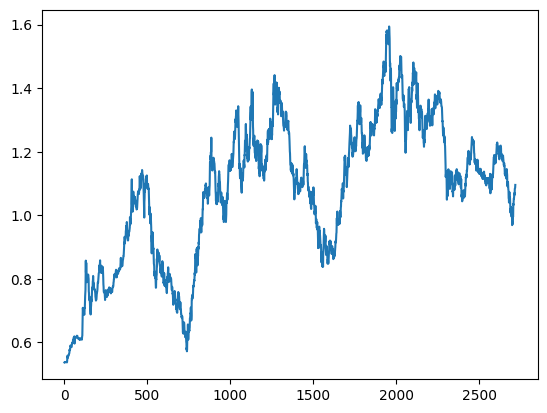

In [8]:
plt.plot(market_data_df.close)

In [9]:
x = market_data_df.index
y = market_data_df.close

In [10]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

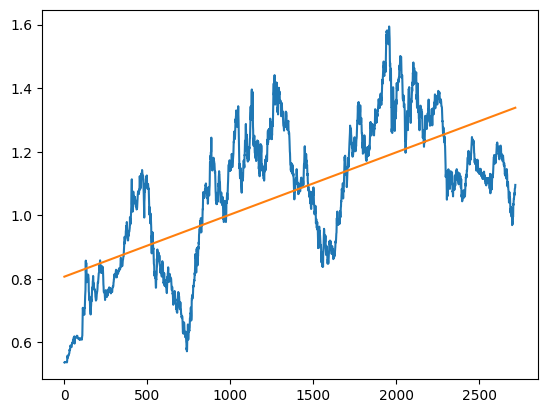

In [11]:
lg = LinearRegression()
lg.fit(x, y)
y_p = lg.predict(x)
plt.plot(y)
plt.plot(y_p)

In [12]:
x2 = np.arange(0, len(x) + 3)

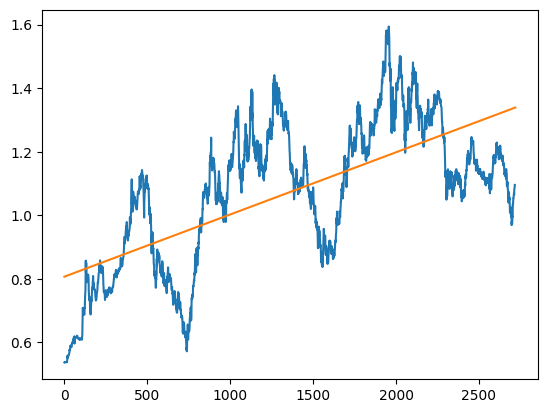

In [13]:
y2 = lg.predict(x2.reshape(-1, 1))
plt.plot(y)
plt.plot(x2, y2)

In [14]:
forcast_out = 5
testsize = 0.2

In [15]:
close_df = market_data_df.close
close_df

0       0.5371
1       0.5376
2       0.5386
3       0.5387
4       0.5384
         ...  
2712    1.0645
2713    1.0832
2714    1.0856
2715    1.0865
2716    1.0955
Name: close, Length: 2717, dtype: float64

In [16]:
colse_shift = np.array([close_df[i + forcast_out] for i in close_df.index[:-5]])

In [17]:
colse_shift

array([0.5381, 0.5385, 0.5379, ..., 1.0856, 1.0865, 1.0955])

In [18]:
label = close_df.shift(-forcast_out)
label

0       0.5381
1       0.5385
2       0.5379
3       0.5386
4       0.5385
         ...  
2712       NaN
2713       NaN
2714       NaN
2715       NaN
2716       NaN
Name: close, Length: 2717, dtype: float64

In [19]:
my_df = pd.concat([close_df, pd.DataFrame(colse_shift)], axis=1)
my_df.rename(columns={0: 'forcast'}, inplace=True)
my_df

,close,forcast
0,0.5371,0.5381
1,0.5376,0.5385
2,0.5386,0.5379
3,0.5387,0.5386
4,0.5384,0.5385
...,...,...
2712,1.0645,NaN
2713,1.0832,NaN
2714,1.0856,NaN
2715,1.0865,NaN


In [20]:
mask = my_df.forcast >= 0
out=my_df[mask]
out

,close,forcast
0,0.5371,0.5381
1,0.5376,0.5385
2,0.5386,0.5379
3,0.5387,0.5386
4,0.5384,0.5385
...,...,...
2707,1.0532,1.0645
2708,1.0530,1.0832
2709,1.0592,1.0856
2710,1.0615,1.0865


In [21]:
x_2=np.array(out.close).reshape(-1,1)
y_2=np.array(out.forcast).reshape(-1,1)

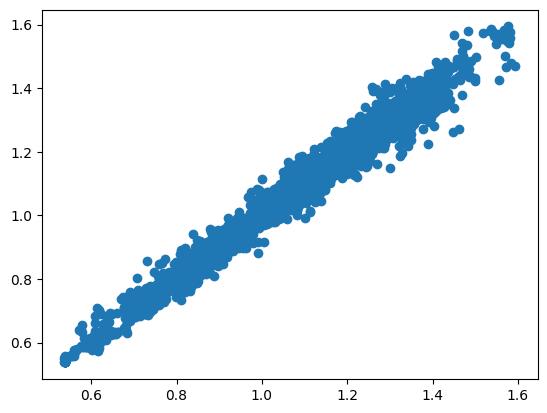

In [22]:
plt.scatter(x_2,y_2)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_2,y_2,test_size=testsize,shuffle=True)

In [24]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [25]:
linear.score(x_test,y_test)

0.9765012676586143

In [28]:
x_lately=my_df.close[-5:]
x_lately=np.array(x_lately).reshape(-1,1)
x_lately

array([[1.0645],
       [1.0832],
       [1.0856],
       [1.0865],
       [1.0955]])

In [29]:
linear.predict(x_lately)

array([[1.06604942],
       [1.08442051],
       [1.0867783 ],
       [1.08766247],
       [1.09650417]])

In [30]:
car_df=pd.read_csv('F:\my project\dataset\learning_dataset\\CarPrice_Assignment.csv')
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [47]:
car_df.drop('CarName',axis=1,inplace=True)

In [48]:
car_df2=pd.get_dummies(car_df)
car_df2

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [49]:
x_c=car_df2.drop('price',axis=1).values
y_c=car_df2.price

In [50]:
#x_c=car_df.values[:,:-1]
#y_c=car_df.values[:,-1]

In [51]:
x_c

array([[  1. ,   3. ,  88.6, ...,   1. ,   0. ,   0. ],
       [  2. ,   3. ,  88.6, ...,   1. ,   0. ,   0. ],
       [  3. ,   1. ,  94.5, ...,   1. ,   0. ,   0. ],
       ...,
       [203. ,  -1. , 109.1, ...,   1. ,   0. ,   0. ],
       [204. ,  -1. , 109.1, ...,   0. ,   0. ,   0. ],
       [205. ,  -1. , 109.1, ...,   1. ,   0. ,   0. ]])

In [52]:
y_c

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [53]:
x_c_train,x_c_test,y_c_train,y_c_test=train_test_split(x_c,y_c,test_size=0.2,shuffle=True)

In [54]:
linear_c=LinearRegression()
linear_c.fit(x_c_train,y_c_train)
linear_c.score(x_c_test,y_c_test)

0.8440989052228957

In [55]:
df=car_df.copy()
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
df.fueltype=pd.Categorical(df.fueltype).codes
df.aspiration=pd.Categorical(df.aspiration).codes
df.doornumber=pd.Categorical(df.doornumber).codes
df.carbody=pd.Categorical(df.carbody).codes
df.drivewheel=pd.Categorical(df.drivewheel).codes
df.enginelocation=pd.Categorical(df.enginelocation).codes
df.cylindernumber=pd.Categorical(df.cylindernumber).codes
df.fuelsystem=pd.Categorical(df.fuelsystem).codes
df.enginetype=pd.Categorical(df.enginetype).codes

In [57]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [58]:
x_=df.drop('price',axis=1)
y_=df.price

In [64]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x_,y_,test_size=0.2,shuffle=True)

In [65]:
linear_=LinearRegression()
linear_.fit(x_tr,y_tr)
linear_.score(x_ts,y_ts)

0.8269230685109622

In [66]:
import statsmodels.api as sm

In [71]:
model=sm.OLS(x_tr,y_tr)
est=model.fit()

In [74]:
predict=est.predict(np.array(x_ts).reshape(-1,1))

In [78]:
x_ts

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
124,125,3,1,1,1,2,2,0,95.9,173.2,...,2,156,6,3.59,3.860,7.00,145,5000,19,24
70,71,-1,0,1,0,3,2,0,115.6,202.6,...,1,183,3,3.58,3.640,21.50,123,4350,22,25
83,84,3,1,1,1,2,1,0,95.9,173.2,...,2,156,6,3.59,3.860,7.00,145,5000,19,24
69,70,0,0,1,1,1,2,0,106.7,187.5,...,1,183,3,3.58,3.640,21.50,123,4350,22,25
93,94,1,1,0,0,4,1,0,94.5,170.2,...,2,97,1,3.15,3.290,9.40,69,5200,31,37
74,75,1,1,0,1,1,2,0,112.0,199.2,...,0,304,5,3.80,3.350,8.00,184,4500,14,16
113,114,0,1,0,0,4,2,0,114.2,198.9,...,2,120,5,3.46,2.190,8.40,95,5000,19,24
136,137,3,1,1,1,2,1,0,99.1,186.6,...,2,121,5,3.54,3.070,9.00,160,5500,19,26
80,81,3,1,1,1,2,1,0,96.3,173.0,...,2,110,6,3.17,3.460,7.50,116,5500,23,30
17,18,0,1,0,0,3,2,0,110.0,197.0,...,3,209,5,3.62,3.390,8.00,182,5400,15,20


In [76]:
y_ts

124    12764.0
70     31600.0
83     14869.0
69     28176.0
93      7349.0
74     45400.0
113    16695.0
136    18150.0
80      9959.0
17     36880.0
106    18399.0
142     7775.0
57     13645.0
4      17450.0
173     8948.0
156     6938.0
84     14489.0
56     11845.0
161     8358.0
21      5572.0
58     15645.0
20      6575.0
87      9279.0
81      8499.0
51      6095.0
175     9988.0
30      6479.0
166     9538.0
3      13950.0
44      8916.5
123     8921.0
103    13499.0
41     12945.0
101    13499.0
131     9895.0
114    17075.0
115    16630.0
133    12170.0
91      6649.0
203    22470.0
171    11549.0
Name: price, dtype: float64

In [77]:
predict

array([[7.10995684e-01, 5.13408053e-03, 6.30665391e-03, ...,
        3.58746665e+01, 1.59420908e-01, 1.98099837e-01],
       [1.70638964e-02, 1.23217933e-04, 1.51359694e-04, ...,
        8.60991996e-01, 3.82610179e-03, 4.75439609e-03],
       [5.68796547e-03, 4.10726442e-05, 5.04532313e-05, ...,
        2.86997332e-01, 1.27536726e-03, 1.58479870e-03],
       ...,
       [2.73022342e+01, 1.97148692e-01, 2.42175510e-01, ...,
        1.37758719e+03, 6.12176287e+00, 7.60703374e+00],
       [1.36511171e-01, 9.85743462e-04, 1.21087755e-03, ...,
        6.88793597e+00, 3.06088143e-02, 3.80351687e-02],
       [1.70638964e-01, 1.23217933e-03, 1.51359694e-03, ...,
        8.60991996e+00, 3.82610179e-02, 4.75439609e-02]])

ValueError: x and y must be the same size

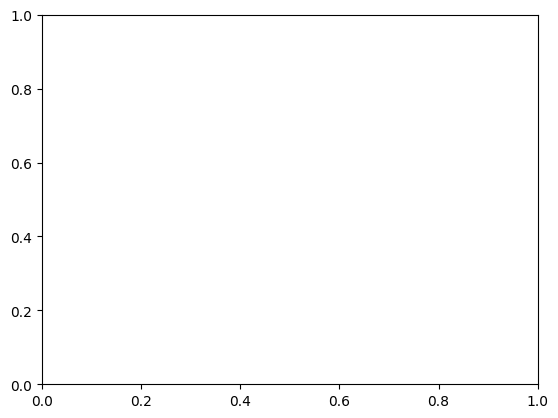

In [75]:
plt.scatter(y_ts,predict)